# Understanding Machine Learning: Gradient Descent
#### By Mason Palmer

## Introduction
Machine learning models aim to capture patterns in data to make predictions on unseen data. One key step in training these models is to adjust the model parameters so that the error (or loss) between predicted and actual values is minimized. In this article, we explore **gradient descent**—one of the most fundamental iterative optimization algorithms used for training models.

## Gradient Descent in Machine Learning

### How It Works
Gradient descent iteratively improves a model by moving its parameters in the direction that most rapidly decreases the loss function. Imagine the loss landscape as a hilly terrain: the peaks represent high loss, and the valleys represent low loss. By computing the gradient (which points uphill) and then moving in the opposite direction (downhill), the model parameters are adjusted until a minimum is reached.

### Mathematical Formulation
The process involves two main steps:

**Step 1: Find the Gradient**

Given a loss function L and model parameters φ, the gradient is computed as:

$$
\begin{align}
L &= \text{Loss Function} \quad \phi = \text{Model Parameters} \\[10pt]
\frac{\partial L}{\partial \phi} &= \left[\begin{array}{c} \frac{\partial L}{\partial \phi_{0}} \\[5pt] \frac{\partial L}{\partial \phi_{1}} \\[5pt] \vdots \\[5pt] \frac{\partial L}{\partial \phi_{N}} \end{array}\right]
\end{align}
$$

**Step 2: Update the Model Parameters**

The parameters are then updated as follows:

$$
\phi \leftarrow \phi - \alpha \cdot \frac{\partial L}{\partial \phi}
$$

Here, α is the learning rate—a small constant that controls the step size.

## A Simple Linear Regression Example
In this example, we demonstrate gradient descent using a simple linear regression model with two parameters (slope and intercept). The model aims to fit data that roughly follows the line:

$$
y = 2x + 4
$$

### Generating a Dummy Dataset
We first generate a set of x values and corresponding y values that include some random offsets to simulate real-world data noise.

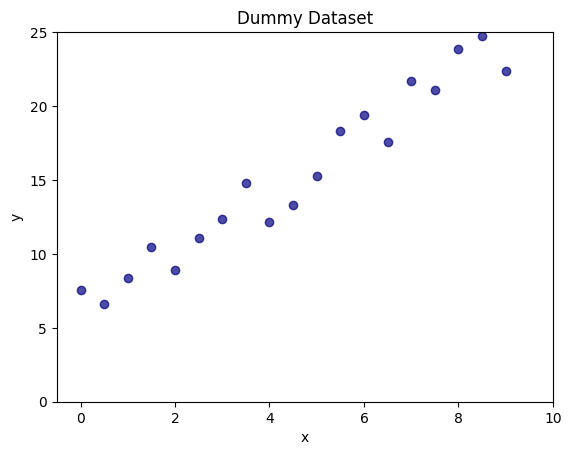

In [31]:
# Import necessary libraries
import random
import matplotlib.pyplot as plt

# Set random seed for reproducibility
random.seed(46)

# Create x values for the dummy dataset
x = [num / 2 for num in range(20)]

# Create y values based on y = 2x + 4 with random offsets
rand_offset_y = [2 * (num / 2) + 4 + random.random() * 4 for num in range(20)]

# Plot the dummy dataset
plt.figure()
plt.scatter(x, rand_offset_y, color='navy', alpha=0.7)
plt.title("Dummy Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.axis((-0.5, 10, 0, 25))
plt.show()

### Initial Model and Loss Calculation
Next, we randomly initialize our model parameters for the linear regression model and define functions for prediction and loss calculation.


Initial model: y = 8x + 6


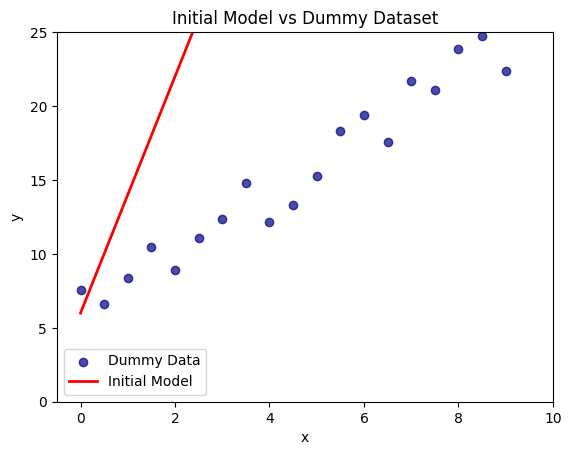

Initial Loss: 21783.64


In [32]:
# Generate random model parameters for y = mx + b
model_parameters = [random.randint(1, 10) for _ in range(2)]
print(f"Initial model: y = {model_parameters[0]}x + {model_parameters[1]}")

def make_prediction(x_values, params):
    """Predict y values given x and model parameters [m, b]."""
    m, b = params
    return [m * xi + b for xi in x_values]

def calculate_loss(y_pred, y_actual):
    """Calculate the sum of squared differences between predictions and actual values."""
    return sum((yp - ya) ** 2 for yp, ya in zip(y_pred, y_actual))

# Compute initial predictions and loss
predictions = make_prediction(x, model_parameters)

plt.figure()
dummy_data_plot = plt.scatter(x, rand_offset_y, color='navy', alpha=0.7)
model_line, = plt.plot(x, predictions, color='red', linewidth=2)
plt.title("Initial Model vs Dummy Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend([dummy_data_plot, model_line], ["Dummy Data", "Initial Model"])
plt.axis((-0.5, 10, 0, 25))
plt.show()

print(f"Initial Loss: {calculate_loss(predictions, rand_offset_y):.2f}")

## Visualizing the Loss Surface
To better understand how gradient descent operates, we visualize the loss surface over a grid of possible model parameters. We use NumPy for efficient calculations and create both 3D surface and 2D contour plots.


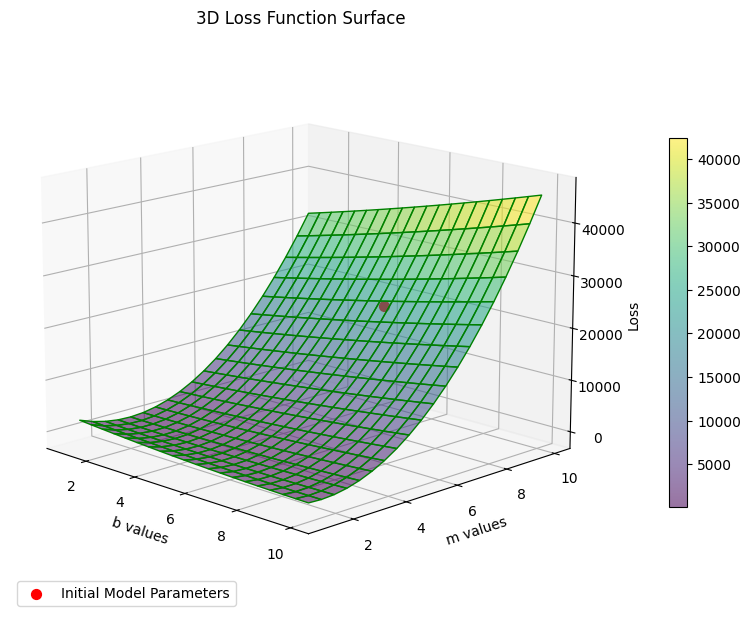

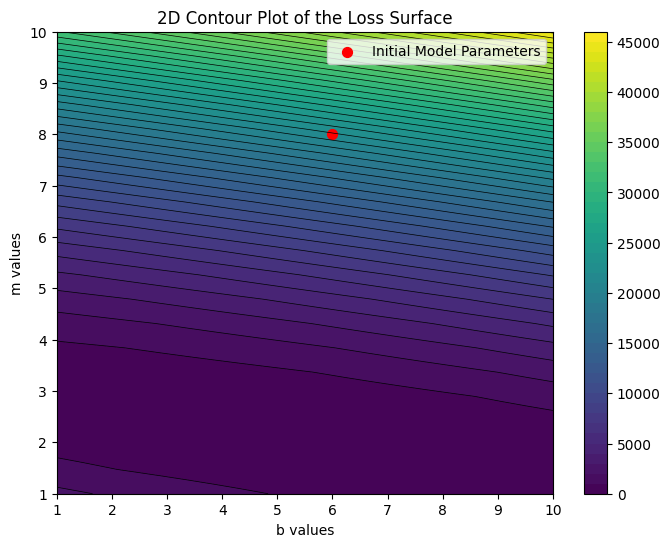

In [33]:
import numpy as np

def np_calculate_loss(y_pred, y_actual):
    """Efficient loss calculation using NumPy."""
    return np.sum((y_pred - y_actual) ** 2)

def np_calculate_predictions(x_array, m, b):
    """Compute predictions using vectorized operations."""
    return m * x_array + b

# Convert data to NumPy arrays for efficiency
np_x = np.array(x)
np_y_actual = np.array(rand_offset_y)

# Define grids for m and b values
ms = np.linspace(1, 10, 20)
bs = np.linspace(1, 10, 20)
Ms, Bs = np.meshgrid(ms, bs)

# Preallocate loss array and compute losses over the grid
losses = np.zeros(Ms.shape)
for i in range(Ms.shape[0]):
    for j in range(Ms.shape[1]):
        predictions = np_calculate_predictions(np_x, Ms[i, j], Bs[i, j])
        losses[i, j] = np_calculate_loss(predictions, np_y_actual)

# 3D Surface Plot of the Loss Function
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Calculate loss for initial model parameters
init_m, init_b = model_parameters
init_predictions = np_calculate_predictions(np_x, init_m, init_b)
init_loss = np_calculate_loss(init_predictions, np_y_actual)

# Plot the loss surface and initial parameter point
surf = ax.plot_surface(Bs, Ms, losses, cmap='viridis', edgecolor='green', alpha=0.55, zorder=-1)
ax.scatter(init_b, init_m, init_loss, color='red', zorder=1, s=50, label="Initial Model Parameters")
ax.set_xlabel("b values")
ax.set_ylabel("m values")
ax.set_zlabel("Loss", rotation=90)
ax.set_title("3D Loss Function Surface")
ax.view_init(elev=15, azim=-45)
ax.legend(loc="lower left")
fig.colorbar(surf, shrink=0.6, aspect=20, pad=0.1)
plt.show()

# 2D Contour Plot of the Loss Surface
fig, ax = plt.subplots(figsize=(8, 6))
contour_filled = ax.contourf(Bs, Ms, losses, levels=50, cmap='viridis')
ax.contour(Bs, Ms, losses, levels=50, colors='black', linewidths=0.5)
ax.scatter(init_b, init_m, color='red', s=50, label="Initial Model Parameters")
ax.set_xlabel("b values")
ax.set_ylabel("m values")
ax.set_title("2D Contour Plot of the Loss Surface")
ax.legend()
fig.colorbar(contour_filled, ax=ax)
plt.show()

## Computing and Applying Gradients
We next derive the gradient of the loss function with respect to the model parameters. For a linear model \( y = mx + b \) with least squares loss, the partial derivatives are:


$$
\frac{\partial L}{\partial m} = 2\sum_{i} x_i (mx_i + b - y_i)
$$

$$
\frac{\partial L}{\partial b} = 2\sum_{i} (mx_i + b - y_i)
$$


These formulas help us determine the direction in which the parameters should change to reduce the loss.

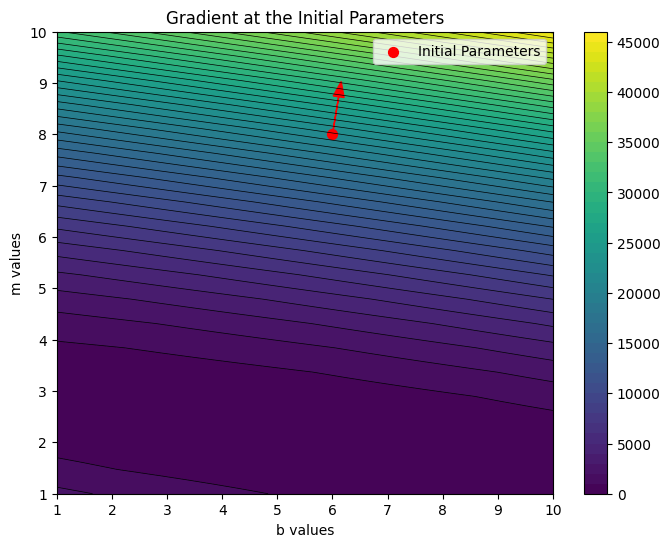

In [34]:
def calculate_gradients(m, b, x_array, y_array):
    """
    Calculate the gradients of the loss function with respect to m and b.
    
    Args:
        m (float): Current slope.
        b (float): Current intercept.
        x_array (np.array): Input data.
        y_array (np.array): Actual target values.
        
    Returns:
        np.array: Gradients [gradient_m, gradient_b].
    """
    errors = (m * x_array + b) - y_array
    gradient_m = 2 * np.sum(x_array * errors)
    gradient_b = 2 * np.sum(errors)
    return np.array([gradient_m, gradient_b])

# Compute initial gradients and scale them with the learning rate
initial_gradients = calculate_gradients(init_m, init_b, np_x, np_y_actual)
alpha = 0.0001  # Learning rate
scaled_initial_gradients = alpha * initial_gradients

# Visualize the gradient on the 2D contour plot
fig, ax = plt.subplots(figsize=(8, 6))
contour_filled = ax.contourf(Bs, Ms, losses, levels=50, cmap='viridis')
ax.contour(Bs, Ms, losses, levels=50, colors='black', linewidths=0.5)
ax.scatter(init_b, init_m, color='red', s=50, label="Initial Parameters")
ax.arrow(init_b, init_m, scaled_initial_gradients[1], scaled_initial_gradients[0],
         head_width=0.2, head_length=0.3, fc='red', ec='red')
ax.set_xlabel("b values")
ax.set_ylabel("m values")
ax.set_title("Gradient at the Initial Parameters")
ax.legend()
fig.colorbar(contour_filled, ax=ax)
plt.show()

Now, we update the model parameters by moving against the gradient:


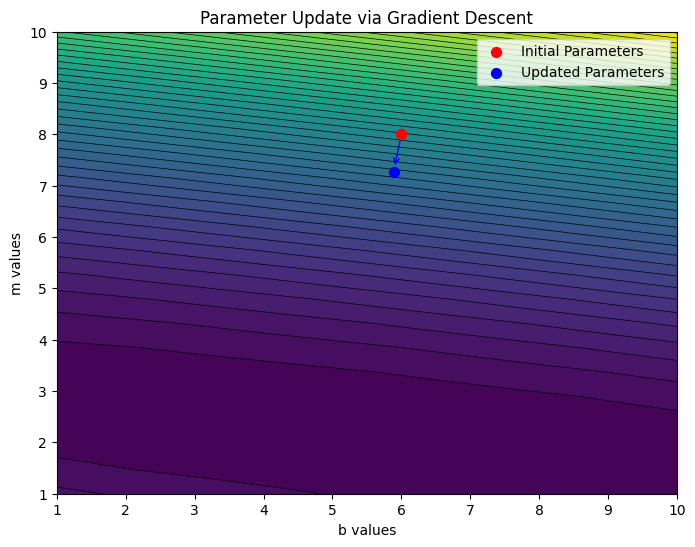

In [35]:
# Visualize the parameter update by moving against the gradient
fig, ax = plt.subplots(figsize=(8, 6))
contour_filled = ax.contourf(Bs, Ms, losses, levels=50, cmap='viridis')
ax.contour(Bs, Ms, losses, levels=50, colors='black', linewidths=0.5)
ax.set_xlabel("b values")
ax.set_ylabel("m values")
ax.set_title("Parameter Update via Gradient Descent")

# Compute new parameters by stepping in the negative gradient direction
updated_b = init_b - scaled_initial_gradients[1]
updated_m = init_m - scaled_initial_gradients[0]

# Annotate the movement on the plot
ax.annotate('', xy=(updated_b, updated_m), xytext=(init_b, init_m),
            arrowprops=dict(arrowstyle='->', color='blue', shrinkA=5, shrinkB=5))
ax.scatter(init_b, init_m, color='red', s=50, label="Initial Parameters", zorder=5)
ax.scatter(updated_b, updated_m, color='blue', s=50, label="Updated Parameters", zorder=5)
ax.legend()
plt.show()

## Animating Gradient Descent
To illustrate the iterative nature of gradient descent, we animate the parameter updates on both the data and the loss surface. The left subplot shows the regression line evolving over the dummy dataset, while the right subplot tracks the parameter trajectory on the contour plot.

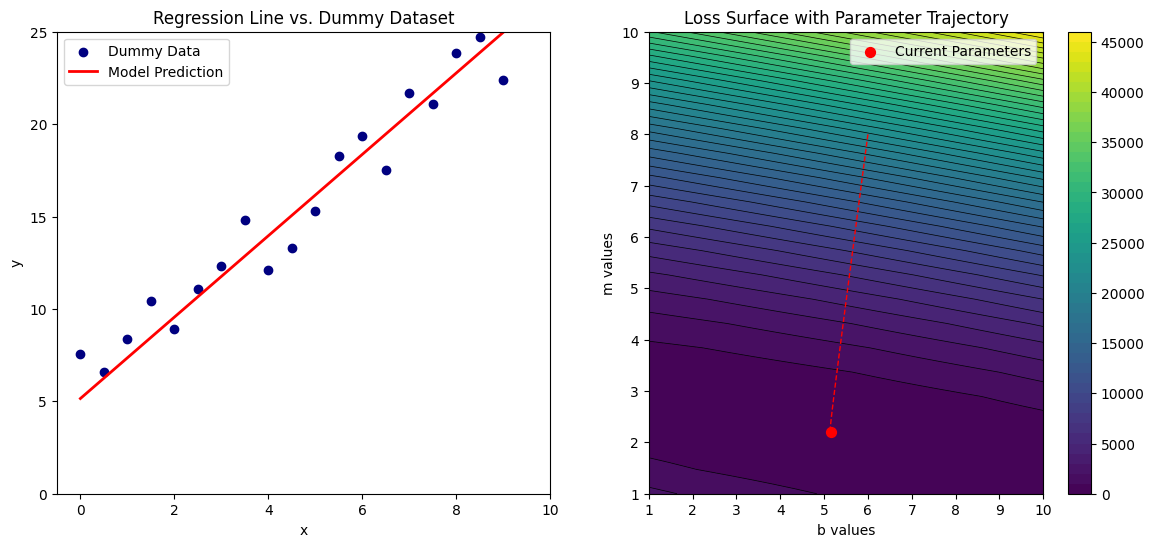

In [36]:
import matplotlib.animation as animation

# Create a figure with two subplots: one for the data and one for the loss contour
fig_new, (ax_data, ax_contour) = plt.subplots(1, 2, figsize=(14, 6))

# Left subplot: Plot the dummy data and initial regression line
ax_data.scatter(x, rand_offset_y, color='navy', label="Dummy Data")
initial_line = np_calculate_predictions(np.array(x), init_m, init_b)
pred_line, = ax_data.plot(x, initial_line, color='red', linewidth=2, label="Model Prediction")
ax_data.set_title("Regression Line vs. Dummy Dataset")
ax_data.set_xlabel("x")
ax_data.set_ylabel("y")
ax_data.axis((-0.5, 10, 0, 25))
ax_data.legend()

# Right subplot: Plot the loss surface contour
ms = np.linspace(1, 10, 20)
bs = np.linspace(1, 10, 20)
Ms, Bs = np.meshgrid(ms, bs)
losses = np.zeros(Ms.shape)
for i in range(Ms.shape[0]):
    for j in range(Ms.shape[1]):
        preds = np_calculate_predictions(np_x, Ms[i, j], Bs[i, j])
        losses[i, j] = np_calculate_loss(preds, np_y_actual)
contour_filled = ax_contour.contourf(Bs, Ms, losses, levels=50, cmap='viridis')
ax_contour.contour(Bs, Ms, losses, levels=50, colors='black', linewidths=0.5)
current_point = ax_contour.scatter(init_b, init_m, color='red', s=50, label="Current Parameters")
ax_contour.set_xlabel("b values")
ax_contour.set_ylabel("m values")
ax_contour.set_title("Loss Surface with Parameter Trajectory")
ax_contour.legend()
fig_new.colorbar(contour_filled, ax=ax_contour)

# Initialize gradient descent variables
alpha = 0.0002        # Learning rate for animation
num_iterations = 25   # Number of gradient descent iterations
current_params = [init_m, init_b]  # [m, b]
trajectory_ms = [init_m]  # Record of m values
trajectory_bs = [init_b]  # Record of b values

# Pre-create a line object to plot the trajectory on the contour
trajectory_line, = ax_contour.plot(trajectory_bs, trajectory_ms, 'r--', linewidth=1)

def init_animation():
    """Reset the animation to the initial state."""
    global current_params, trajectory_ms, trajectory_bs
    current_params = [init_m, init_b]
    trajectory_ms = [init_m]
    trajectory_bs = [init_b]
    pred_line.set_ydata(np_calculate_predictions(np.array(x), init_m, init_b))
    current_point.set_offsets([init_b, init_m])
    trajectory_line.set_data(trajectory_bs, trajectory_ms)
    return pred_line, current_point, trajectory_line

def update_animation(frame):
    """
    Update function for the animation.
    
    Args:
        frame (int): The current frame number.
    
    Returns:
        Updated plot elements.
    """
    global current_params, trajectory_ms, trajectory_bs
    if frame == 0:
        return pred_line, current_point, trajectory_line

    # Compute gradients at the current parameters
    grads = calculate_gradients(current_params[0], current_params[1], np_x, np_y_actual)
    # Update parameters by moving against the gradient
    current_params = [current_params[0] - alpha * grads[0],
                      current_params[1] - alpha * grads[1]]
    trajectory_ms.append(current_params[0])
    trajectory_bs.append(current_params[1])
    
    # Update the regression line in the left subplot
    new_line = np_calculate_predictions(np.array(x), current_params[0], current_params[1])
    pred_line.set_ydata(new_line)
    # Update the current parameter marker on the right subplot
    current_point.set_offsets([current_params[1], current_params[0]])
    # Update the trajectory line with all recorded parameter updates
    trajectory_line.set_data(trajectory_bs, trajectory_ms)
    
    return pred_line, current_point, trajectory_line

# Create the animation
anim = animation.FuncAnimation(
    fig_new,
    update_animation,
    frames=range(num_iterations + 1),
    init_func=init_animation,
    interval=200,
    blit=False
)

# Save the animation as a GIF (ensure 'pillow' is installed)
anim.save('gradient_descent_animation.gif', writer='pillow', fps=5)
plt.show()

## Conclusion: Beyond Basic Gradient Descent
Full-batch gradient descent provides a foundational understanding of training by iteratively minimizing a loss function. However, computing the gradient over an entire dataset for each update can be computationally expensive—especially with large datasets. To address this, methods such as **mini-batch gradient descent** (which splits data into smaller batches), **momentum** (which smooths updates), and **Adam (Adaptive Moment Estimation)** (which adapts learning rates based on gradient moments) have been developed. These advanced techniques offer faster convergence, improved stability, and better performance on large-scale or noisy datasets.

## Summary
In this article, we:
- Introduced the concept of gradient descent and its importance in machine learning.
- Explained the mathematical formulation of gradient descent with clear equations and examples.
- Built a simple linear regression model to demonstrate the application of gradient descent.
- Visualized the loss landscape and gradient steps using both 3D and 2D plots.
- Created an animation to illustrate how model parameters evolve through iterative updates.
- Discussed advanced optimization techniques that extend basic gradient descent.

By understanding these concepts and visualizations, you are well-prepared to experiment with more sophisticated optimization methods in your own machine learning projects.